In [92]:
import pandas as pd

In [93]:
area = pd.Series({"CN": 9.6, "RU": 17, "US": 9.8})
population = pd.Series({"CN": 1386, "RU": 144, "US": 327})

In [94]:
area.dtype

dtype('float64')

In [95]:
countries = pd.DataFrame(
    {"area": area, "population": population}
)
countries

,area,population
CN,9.6,1386
RU,17.0,144
US,9.8,327


## importing / exporting data

In [96]:
# reading from the internet
# euribor = pd.read_csv(
#     "http://datahub.io/core/euribor/r/euribor-12m-monthly.csv"
# )

# read local files
euribor = pd.read_csv(
    "../euribor-12m-monthly.csv",
    index_col="date",
    usecols=["date", "rate"],
    dtype={"rate": "float32"},
    parse_dates=["date"]
)

In [97]:
sp500 = pd.read_csv(
    "../sp500.csv",
    index_col="Date",
    parse_dates=["Date"]
)

In [98]:
exchange_rates = pd.read_csv(
    "../exchange_rates.csv",
    header=0,
    names=["date", "country", "exchange_rate"],
    parse_dates=["date"]
)

In [99]:
iris = pd.read_csv(
    "../iris.csv",
    header=None,
    names=["sepal_length", "sepal_width", "petal_length",
           "petal_width", "species"]
)

In [100]:
titanic = pd.read_csv("../titanic.csv", index_col="PassengerId")

In [101]:
titanic.to_excel("titanic.xlsx")

In [102]:
titanic.to_hdf("data.hdf5", "titanic")

c:\Users\marko\anaconda3\lib\site-packages\pandas\core\generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')]

  pytables.to_hdf(


In [103]:
euribor.to_hdf("data.hdf5", "euribor")

In [104]:
titanic["Age"].quantile(1)

80.0

In [105]:
titanic["Age"].shape

(891,)

In [106]:
titanic["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [107]:
titanic["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [108]:
sp500.index

DatetimeIndex(['1871-01-01', '1871-02-01', '1871-03-01', '1871-04-01',
               '1871-05-01', '1871-06-01', '1871-07-01', '1871-08-01',
               '1871-09-01', '1871-10-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', name='Date', length=1768, freq=None)

In [109]:
sp500.columns

Index(['SP500', 'Dividend', 'Earnings', 'Consumer Price Index',
       'Long Interest Rate', 'Real Price', 'Real Dividend', 'Real Earnings',
       'PE10'],
      dtype='object')

In [110]:
titanic["Age"]

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [111]:
titanic.Age

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [112]:
sp500

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
Date,,,,,,,,,
1871-01-01,4.44,0.26,0.40,12.46,5.32,89.00,5.21,8.02,NaN
1871-02-01,4.50,0.26,0.40,12.84,5.32,87.53,5.06,7.78,NaN
1871-03-01,4.61,0.26,0.40,13.03,5.33,88.36,4.98,7.67,NaN
1871-04-01,4.74,0.26,0.40,12.56,5.33,94.29,5.17,7.96,NaN
1871-05-01,4.86,0.26,0.40,12.27,5.33,98.93,5.29,8.14,NaN
...,...,...,...,...,...,...,...,...,...
2017-12-01,2664.34,48.93,109.88,246.52,2.40,2700.13,49.59,111.36,32.09
2018-01-01,2789.80,49.29,NaN,247.87,2.58,2811.96,49.68,NaN,33.31
2018-02-01,2705.16,49.64,NaN,248.99,2.86,2714.34,49.81,NaN,32.12


In [113]:
sp500.loc["1973-01-01" : "1973-12-31"]

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
Date,,,,,,,,,
1973-01-01,118.40,3.16,6.55,42.6,6.46,694.38,18.51,38.39,18.71
1973-02-01,114.20,3.16,6.67,42.9,6.64,665.06,18.42,38.86,17.89
1973-03-01,112.40,3.17,6.80,43.3,6.71,648.53,18.29,39.24,17.41
1973-04-01,110.30,3.19,6.94,43.6,6.67,632.04,18.26,39.79,16.94
1973-05-01,107.20,3.20,7.09,43.9,6.85,610.08,18.23,40.33,16.31
1973-06-01,104.80,3.22,7.23,44.2,6.90,592.37,18.20,40.87,15.81
1973-07-01,105.80,3.24,7.38,44.3,7.13,596.67,18.25,41.64,15.89
1973-08-01,103.80,3.25,7.54,45.1,7.40,575.01,18.02,41.75,15.28
1973-09-01,105.60,3.27,7.69,45.2,7.09,583.69,18.07,42.51,15.48


In [114]:
sp500.iloc[0:10]

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
Date,,,,,,,,,
1871-01-01,4.44,0.26,0.4,12.46,5.32,89.00,5.21,8.02,NaN
1871-02-01,4.50,0.26,0.4,12.84,5.32,87.53,5.06,7.78,NaN
1871-03-01,4.61,0.26,0.4,13.03,5.33,88.36,4.98,7.67,NaN
1871-04-01,4.74,0.26,0.4,12.56,5.33,94.29,5.17,7.96,NaN
1871-05-01,4.86,0.26,0.4,12.27,5.33,98.93,5.29,8.14,NaN
1871-06-01,4.82,0.26,0.4,12.08,5.34,99.66,5.38,8.27,NaN
1871-07-01,4.73,0.26,0.4,12.08,5.34,97.80,5.38,8.27,NaN
1871-08-01,4.79,0.26,0.4,11.89,5.34,100.62,5.46,8.40,NaN
1871-09-01,4.84,0.26,0.4,12.18,5.35,99.29,5.33,8.21,NaN


In [115]:
titanic[titanic["Age"] >= 70]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [116]:
titanic.sample(frac=1.0)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
396,0,3,"Johansson, Mr. Erik",male,22.0,0,0,350052,7.7958,NaN,S
478,0,3,"Braund, Mr. Lewis Richard",male,29.0,1,0,3460,7.0458,NaN,S
212,1,2,"Cameron, Miss. Clear Annie",female,35.0,0,0,F.C.C. 13528,21.0000,NaN,S
814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C
148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,NaN,S
364,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S


In [117]:
sp500.iloc[0]

SP500                    4.44
Dividend                 0.26
Earnings                 0.40
Consumer Price Index    12.46
Long Interest Rate       5.32
Real Price              89.00
Real Dividend            5.21
Real Earnings            8.02
PE10                      NaN
Name: 1871-01-01 00:00:00, dtype: float64

In [118]:
sp500.iloc[-10:]

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
Date,,,,,,,,,
2017-07-01,2454.10,47.54,105.04,244.79,2.32,2504.72,48.52,107.21,30.00
2017-08-01,2456.22,47.85,106.06,245.52,2.21,2499.40,48.69,107.92,29.91
2017-09-01,2492.84,48.17,107.08,246.82,2.20,2523.31,48.76,108.39,30.17
2017-10-01,2557.00,48.42,108.01,246.66,2.36,2589.89,49.05,109.40,30.92
2017-11-01,2593.61,48.68,108.95,246.67,2.35,2626.90,49.30,110.35,31.30
2017-12-01,2664.34,48.93,109.88,246.52,2.40,2700.13,49.59,111.36,32.09
2018-01-01,2789.80,49.29,NaN,247.87,2.58,2811.96,49.68,NaN,33.31
2018-02-01,2705.16,49.64,NaN,248.99,2.86,2714.34,49.81,NaN,32.12
2018-03-01,2702.77,50.00,NaN,249.55,2.84,2705.82,50.06,NaN,31.99


In [119]:
sp500.sample(10)

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
Date,,,,,,,,,
1949-03-01,14.91,0.98,2.38,23.80,2.31,156.51,10.29,24.98,9.90
1948-06-01,16.82,0.85,1.86,24.10,2.39,174.37,8.81,19.28,11.58
1915-01-01,7.48,0.42,0.55,10.10,4.24,185.03,10.41,13.60,10.36
2004-08-01,1088.94,18.97,57.23,189.50,4.28,1435.65,25.01,75.45,25.17
2009-01-01,865.58,28.01,12.21,211.14,2.52,1024.20,33.15,14.44,15.17
1935-07-01,10.65,0.44,0.79,13.70,2.72,194.22,8.02,14.47,13.20
1951-10-01,23.36,1.48,2.49,26.20,2.65,222.75,14.14,23.71,12.31
1903-07-01,6.85,0.34,0.57,8.18,3.35,209.15,10.43,17.46,16.92
1933-02-01,6.25,0.49,0.41,12.70,3.29,122.95,9.64,8.16,7.83


In [120]:
sp500.loc["2009-01-01"]

SP500                    865.58
Dividend                  28.01
Earnings                  12.21
Consumer Price Index     211.14
Long Interest Rate         2.52
Real Price              1024.20
Real Dividend             33.15
Real Earnings             14.44
PE10                      15.17
Name: 2009-01-01 00:00:00, dtype: float64

In [121]:
sp500.loc["2009-01-01" : "2009-12-31"]

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
Date,,,,,,,,,
2009-01-01,865.58,28.01,12.21,211.14,2.52,1024.20,33.15,14.44,15.17
2009-02-01,805.23,27.64,9.53,212.19,2.87,948.08,32.54,11.22,14.12
2009-03-01,757.13,27.26,6.86,212.71,2.82,889.28,32.02,8.06,13.32
2009-04-01,848.15,26.70,7.08,213.24,2.93,993.71,31.29,8.29,14.98
2009-05-01,902.41,26.15,7.29,213.86,3.29,1054.23,30.55,8.52,16.00
2009-06-01,926.12,25.59,7.51,215.69,3.72,1072.72,29.64,8.70,16.38
2009-07-01,935.82,25.03,9.19,215.35,3.56,1085.67,29.03,10.66,16.69
2009-08-01,1009.73,24.46,10.86,215.83,3.59,1168.80,28.32,12.57,18.09
2009-09-01,1044.55,23.90,12.54,215.97,3.40,1208.35,27.65,14.51,18.83


In [122]:
sp500[sp500["Long Interest Rate"] > 14]

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
Date,,,,,,,,,
1981-05-01,131.7,6.35,14.87,89.8,14.10,366.41,17.68,41.36,8.82
1981-07-01,129.1,6.43,15.10,91.6,14.28,352.12,17.55,41.18,8.45
1981-08-01,129.6,6.48,15.18,92.3,14.94,350.80,17.53,41.10,8.40
1981-09-01,118.3,6.52,15.27,93.2,15.32,317.12,17.48,40.93,7.58
1981-10-01,119.8,6.56,15.30,93.4,15.15,320.45,17.54,40.93,7.65
1982-01-01,117.3,6.66,15.18,94.3,14.59,310.77,17.64,40.21,7.39
1982-02-01,114.5,6.69,14.99,94.6,14.43,302.39,17.67,39.60,7.18
1982-06-01,109.7,6.81,14.17,97.0,14.30,282.55,17.54,36.50,6.69


In [123]:
# When was the S&P 500 at its highest value?

sp500_max = sp500["SP500"].max()
sp500_max # 2789.8 is the maximum
sp500[ sp500["SP500"] == sp500_max ] # look for  2789.8

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
Date,,,,,,,,,
2018-01-01,2789.8,49.29,NaN,247.87,2.58,2811.96,49.68,NaN,33.31


In [124]:
sp500.loc["1973-01-01", "Long Interest Rate"]

6.46

In [125]:
sp500.iloc[100, 0]

3.94

In [126]:
titanic["Age"].sort_values()

PassengerId
804    0.42
756    0.67
645    0.75
470    0.75
79     0.83
       ... 
860     NaN
864     NaN
869     NaN
879     NaN
889     NaN
Name: Age, Length: 891, dtype: float64

In [127]:
titanic.sort_values(["Sex", "Age"])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C
120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C


In [128]:
titanic.sort_values("Age", ascending=False)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [129]:
titanic.query("Sex == 'male' and Age > 30 and Pclass == 1")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
...,...,...,...,...,...,...,...,...,...,...,...
807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S
823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S
858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S


In [130]:
titanic[(titanic["Sex"] == 'male') & (titanic["Age"] > 30) & (titanic["Pclass"] == 1)];

In [131]:
titanic[(titanic["Age"] >= 18) & (titanic["Sex"] == "male")].sort_values("Age");

In [132]:
titanic.sort_values("Age")[(titanic["Age"] >= 18) & (titanic["Sex"] == "male")];

C:\Users\marko\AppData\Local\Temp/ipykernel_6992/691616859.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  titanic.sort_values("Age")[(titanic["Age"] >= 18) & (titanic["Sex"] == "male")];


In [133]:
euribor.columns = ["rate"]

In [134]:
sp500_new = sp500.drop(["1871-01-01", "1871-02-01"])
sp500_new = sp500.drop(columns=["Real Earnings", "PE10"])
sp500_new

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend
Date,,,,,,,
1871-01-01,4.44,0.26,0.40,12.46,5.32,89.00,5.21
1871-02-01,4.50,0.26,0.40,12.84,5.32,87.53,5.06
1871-03-01,4.61,0.26,0.40,13.03,5.33,88.36,4.98
1871-04-01,4.74,0.26,0.40,12.56,5.33,94.29,5.17
1871-05-01,4.86,0.26,0.40,12.27,5.33,98.93,5.29
...,...,...,...,...,...,...,...
2017-12-01,2664.34,48.93,109.88,246.52,2.40,2700.13,49.59
2018-01-01,2789.80,49.29,NaN,247.87,2.58,2811.96,49.68
2018-02-01,2705.16,49.64,NaN,248.99,2.86,2714.34,49.81


In [135]:
titanic["Survived"] = titanic["Survived"].astype("bool")

In [136]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,False,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,True,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,False,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [137]:
titanic["Female"] = titanic["Sex"].replace({ "female": True, "male": False })

In [138]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female
PassengerId,,,,,,,,,,,,
1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...
887,False,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,False
888,True,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,True
889,False,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,True


In [139]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [140]:
iris["sepal_ratio"] = iris["sepal_length"] / iris["sepal_width"]

In [141]:
iris["sepal_ratio"]

0      1.457143
1      1.633333
2      1.468750
3      1.483871
4      1.388889
         ...   
145    2.233333
146    2.520000
147    2.166667
148    1.823529
149    1.966667
Name: sepal_ratio, Length: 150, dtype: float64

In [142]:
sp500

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
Date,,,,,,,,,
1871-01-01,4.44,0.26,0.40,12.46,5.32,89.00,5.21,8.02,NaN
1871-02-01,4.50,0.26,0.40,12.84,5.32,87.53,5.06,7.78,NaN
1871-03-01,4.61,0.26,0.40,13.03,5.33,88.36,4.98,7.67,NaN
1871-04-01,4.74,0.26,0.40,12.56,5.33,94.29,5.17,7.96,NaN
1871-05-01,4.86,0.26,0.40,12.27,5.33,98.93,5.29,8.14,NaN
...,...,...,...,...,...,...,...,...,...
2017-12-01,2664.34,48.93,109.88,246.52,2.40,2700.13,49.59,111.36,32.09
2018-01-01,2789.80,49.29,NaN,247.87,2.58,2811.96,49.68,NaN,33.31
2018-02-01,2705.16,49.64,NaN,248.99,2.86,2714.34,49.81,NaN,32.12


In [143]:
diff = sp500["SP500"].diff()
# absolute difference
sp500["Diff"] = diff
# relative difference
sp500["Gain"] = sp500["Diff"] / sp500["SP500"]

# extract columns in a specific order
sp500

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10,Diff,Gain
Date,,,,,,,,,,,
1871-01-01,4.44,0.26,0.40,12.46,5.32,89.00,5.21,8.02,NaN,NaN,NaN
1871-02-01,4.50,0.26,0.40,12.84,5.32,87.53,5.06,7.78,NaN,0.06,0.013333
1871-03-01,4.61,0.26,0.40,13.03,5.33,88.36,4.98,7.67,NaN,0.11,0.023861
1871-04-01,4.74,0.26,0.40,12.56,5.33,94.29,5.17,7.96,NaN,0.13,0.027426
1871-05-01,4.86,0.26,0.40,12.27,5.33,98.93,5.29,8.14,NaN,0.12,0.024691
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,2664.34,48.93,109.88,246.52,2.40,2700.13,49.59,111.36,32.09,70.73,0.026547
2018-01-01,2789.80,49.29,NaN,247.87,2.58,2811.96,49.68,NaN,33.31,125.46,0.044971
2018-02-01,2705.16,49.64,NaN,248.99,2.86,2714.34,49.81,NaN,32.12,-84.64,-0.031288


In [144]:
sp500["Gain"].idxmax()

Timestamp('1932-08-01 00:00:00')

In [145]:
titanic["Age"].shape

(891,)

In [146]:
titanic["Age"].count()

714

In [147]:
titanic["Cabin"].count()

204

In [148]:
titanic[titanic["Age"].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female
PassengerId,,,,,,,,,,,,
6,False,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,False
18,True,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,False
20,True,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,True
27,False,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,False
29,True,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,True
...,...,...,...,...,...,...,...,...,...,...,...,...
860,False,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,False
864,False,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,True
869,False,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,False


In [149]:
titanic.dropna(subset=["Age"])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female
PassengerId,,,,,,,,,,,,
1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,True
887,False,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,False
888,True,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,True


In [150]:
import numpy as np

data = pd.Series(
    [1, 2, 4, np.nan, 16, 32, np.nan, np.nan, 256]
)

<AxesSubplot:>

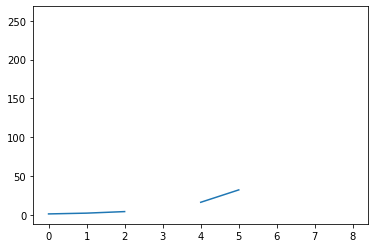

In [151]:
data.plot()

<AxesSubplot:>

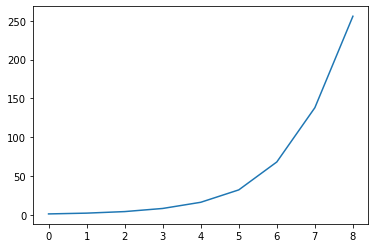

In [168]:
interpolated_data = data.interpolate("cubic")
interpolated_data.plot()

In [153]:
euribor["rate"]

date
1999-01-01    3.213
1999-02-01    2.998
1999-03-01    3.079
1999-04-01    2.939
1999-05-03    2.680
              ...  
2016-12-01   -0.079
2017-01-02   -0.083
2017-02-01   -0.103
2017-03-01   -0.114
2017-04-03   -0.111
Name: rate, Length: 220, dtype: float32

In [154]:
sp500["Long Interest Rate"]

Date
1871-01-01    5.32
1871-02-01    5.32
1871-03-01    5.33
1871-04-01    5.33
1871-05-01    5.33
              ... 
2017-12-01    2.40
2018-01-01    2.58
2018-02-01    2.86
2018-03-01    2.84
2018-04-01    2.80
Name: Long Interest Rate, Length: 1768, dtype: float64

In [172]:
interest_rates = pd.DataFrame({
    "us": sp500["Long Interest Rate"],
    "eu": euribor["rate"]
})

interest_rates["eu"] = interest_rates["eu"].interpolate("slinear")
interest_rates = interest_rates.dropna()

In [173]:
interest_rates

,us,eu
1999-01-01,4.72,3.213000
1999-02-01,5.00,2.998000
1999-03-01,5.23,3.079000
1999-04-01,5.18,2.939000
1999-05-01,5.54,2.696187
...,...,...
2016-12-01,2.49,-0.079000
2017-01-01,2.43,-0.082875
2017-02-01,2.42,-0.103000
2017-03-01,2.48,-0.114000


<AxesSubplot:>

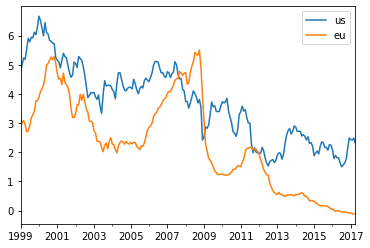

In [177]:
interest_rates.plot()

In [163]:
interest_rates.describe()

,us,eu
count,1768.000000,220.000000
mean,4.569559,2.318205
std,2.289630,1.597181
min,1.500000,-0.114000
25%,3.290000,0.769750
50%,3.860000,2.241500
75%,5.222500,3.633750
max,15.320000,5.505000


<AxesSubplot:>

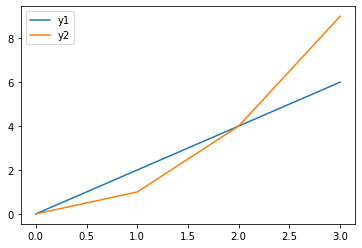

In [178]:
import numpy as np
import pandas as pd

x = np.array([0, 1, 2, 3])

data = pd.DataFrame({
    "y1": x*2,
    "y2": x**2
})

data.plot()

<AxesSubplot:xlabel='date'>

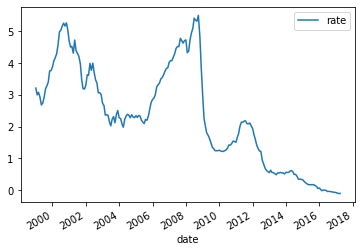

In [179]:
euribor.plot()

<AxesSubplot:xlabel='date'>

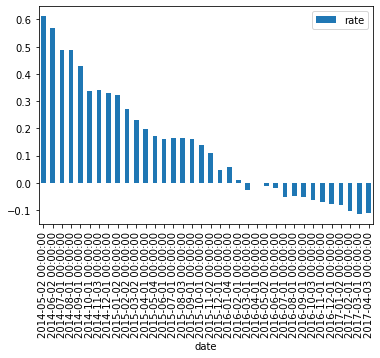

In [180]:
euribor.iloc[-36:].plot.bar()

In [181]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,1.457143
1,4.9,3.0,1.4,0.2,Iris-setosa,1.633333
2,4.7,3.2,1.3,0.2,Iris-setosa,1.468750
3,4.6,3.1,1.5,0.2,Iris-setosa,1.483871
4,5.0,3.6,1.4,0.2,Iris-setosa,1.388889
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2.233333
146,6.3,2.5,5.0,1.9,Iris-virginica,2.520000
147,6.5,3.0,5.2,2.0,Iris-virginica,2.166667
148,6.2,3.4,5.4,2.3,Iris-virginica,1.823529


C:\Users\marko\AppData\Local\Temp/ipykernel_6992/3779410064.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  iris.median().plot.bar()


<AxesSubplot:>

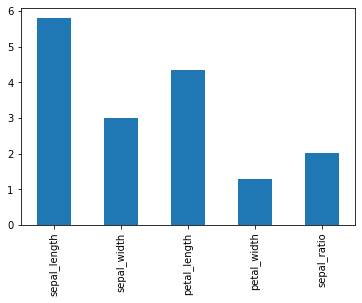

In [184]:
iris.median().plot.bar()

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

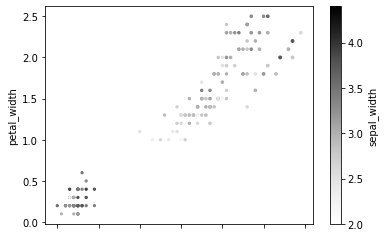

In [188]:
iris.plot.scatter(x="petal_length", y="petal_width", s="sepal_length", c="sepal_width")

<AxesSubplot:ylabel='Frequency'>

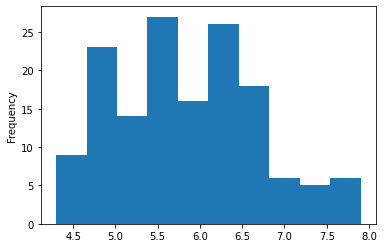

In [190]:
iris["sepal_length"].plot.hist()

<AxesSubplot:>

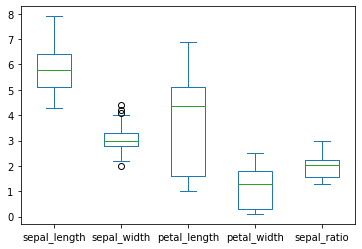

In [192]:
iris.plot.box()

<AxesSubplot:ylabel='Surface of the earth'>

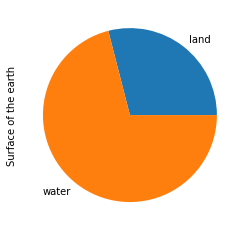

In [193]:
surface = pd.Series({"land": 0.29, "water": 0.71})

surface.plot.pie(ylabel="Surface of the earth")

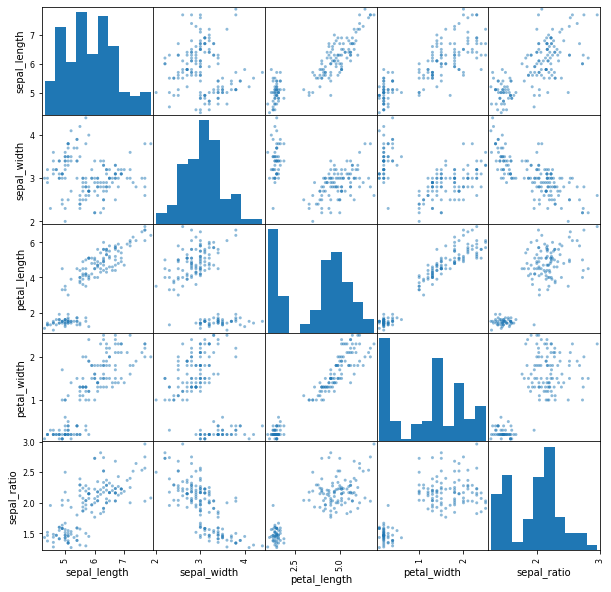

In [197]:
from pandas.plotting import scatter_matrix

scatter_matrix(iris, figsize=(10, 10));